<a href="https://colab.research.google.com/github/Bolu-Feng/PHYS549/blob/main/lc_process_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1.1 Install eleanor](#first-bullet)

[1.2 Get the name of stars from table](#second-bullet)

[1.3 Get LC](#third-bullet)

[1.4 ](#fourth-bullet)

# 1.1 Install lightkurve <a class="anchor" id="first-bullet"></a>

In [16]:
 !pip install eleanor
 !pip install lightkurve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1.2 Get the name list of stars from table <a class="anchor" id="second-bullet"></a>

In [18]:
# import eleanor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
KOI = pd.read_csv('q1_q17_dr24_koi_2022.11.01_10.01.01.csv')
KOI

#print(TOI['toi'])

kepid kepoi_name    kepler_name koi_disposition koi_pdisposition  \
0     11446443  K00001.01     Kepler-1 b       CONFIRMED        CANDIDATE   
1     10666592  K00002.01     Kepler-2 b       CONFIRMED        CANDIDATE   
2     10748390  K00003.01     Kepler-3 b       CONFIRMED        CANDIDATE   
3      3861595  K00004.01  Kepler-1658 b       CONFIRMED        CANDIDATE   
4      8554498  K00005.01            NaN       CANDIDATE        CANDIDATE   
...        ...        ...            ...             ...              ...   
7465  11463950  K07616.01            NaN  FALSE POSITIVE   FALSE POSITIVE   
7466  11559304  K07617.01            NaN       CANDIDATE        CANDIDATE   
7467  11621897  K07618.01            NaN  FALSE POSITIVE   FALSE POSITIVE   
7468  12253534  K07619.01            NaN  FALSE POSITIVE   FALSE POSITIVE   
7469  12304202  K07620.01            NaN  FALSE POSITIVE   FALSE POSITIVE   

      koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0           NaN              0              0              0              0   
1           NaN              0              1              0              0   
2           NaN              0              0              0              0   
3           NaN              0              1              0              0   
4           NaN              0              0              0              0   
...         ...            ...            ...            ...            ...   
7465        NaN              1              0              0              0   
7466        NaN              0              0              0              0   
7467        NaN              1              0              0              0   
7468        NaN              1              0              0              0   
7469        NaN              1              0              0              0   

      ...  koi_insol  koi_model_snr  koi_tce_plnt_num  koi_tce_delivname  \
0     ...     772.22         6802.0                 1    q1_q17_dr24_tce   
1     ...    3973.70         6714.5                 1    q1_q17_dr24_tce   
2     ...      97.10         2207.8                 1    q1_q17_dr24_tce   
3     ...    4055.29          262.6                 1    q1_q17_dr24_tce   
4     ...     898.71          383.4                 1    q1_q17_dr24_tce   
...   ...        ...            ...               ...                ...   
7465  ...        NaN            NaN                 1    q1_q17_dr24_tce   
7466  ...       3.26            8.2                 1    q1_q17_dr24_tce   
7467  ...      60.99            9.8                 1    q1_q17_dr24_tce   
7468  ...       2.05           14.1                 1    q1_q17_dr24_tce   
7469  ...        NaN            NaN                 1    q1_q17_dr24_tce   

      koi_steff  koi_slogg  koi_srad         ra        dec  koi_kepmag  
0        5850.0      4.455     0.950  286.80847  49.316399      11.338  
1        6350.0      4.021     1.991  292.24728  47.969521      10.463  
2        4777.0      4.590     0.765  297.70935  48.080853       9.174  
3        6244.0      3.657     2.992  294.35654  38.947380      11.432  
4        5753.0      4.003     1.747  289.73972  44.647419      11.665  
...         ...        ...       ...        ...        ...         ...  
7465        NaN        NaN       NaN  295.95383  49.374859      13.397  
7466     3578.0      4.893     0.375  291.97635  49.575771      15.720  
7467     6297.0      4.448     1.031  296.82455  49.684910      14.491  
7468     6098.0      4.097     1.590  288.66644  50.982529      12.159  
7469        NaN        NaN       NaN  289.52319  51.069191      13.362  

[7470 rows x 27 columns]

# 1.3 Get LC <a class="anchor" id="second-bullet"></a>

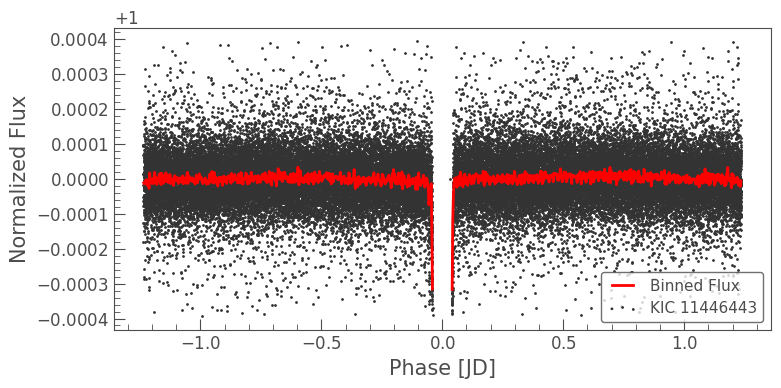

In [ ]:
import lightkurve as lk
import pandas as pd
import matplotlib.pyplot as plt




for ind, row in KOI.iterrows():
  if row['koi_disposition'] == 'CONFIRMED':
    kepid = str(row['kepid'])
    search_result = lk.search_lightcurve(kepid, author='Kepler', cadence='long')
    lc_collection = search_result.download_all()
    #lc_collection.plot();
    lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
    #lc.plot();
    # Create array of periods to search
    period = np.linspace(1, 20, 10000)
    # Create a BLSPeriodogram
    planet_b_period = row['koi_period']
    planet_b_t0 = row['koi_time0bk']
    planet_b_dur = row['koi_duration']
    #planet_b_model = bls.get_transit_model(period=planet_b_period, transit_time=planet_b_t0, duration=planet_b_dur/24)
    ax = lc.fold(planet_b_period, planet_b_t0).scatter()
    #planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
    #ax.set_xlim(-planet_b_period/2, planet_b_period/2);
    lc.fold(planet_b_period, planet_b_t0).bin(planet_b_period/1000).plot(ax=ax, c='r', lw=2, label='Binned Flux')
    break

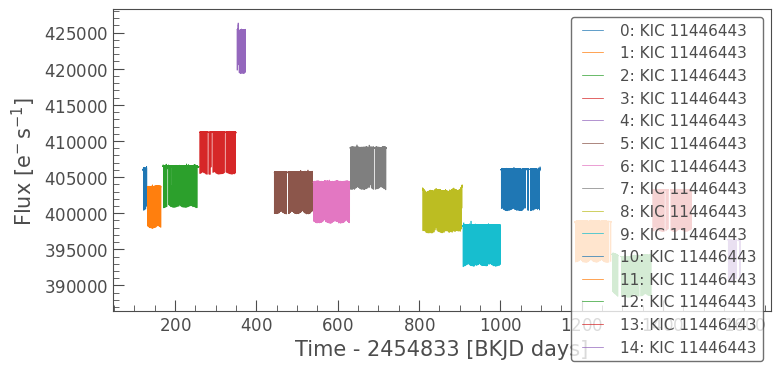

In [ ]:
import lightkurve as lk
import pandas as pd
import matplotlib.pyplot as plt

# Search for Kepler observations of Kepler-69
search_result = lk.search_lightcurve('11446443', author='Kepler', cadence='long')
# Download all available Kepler light curves
lc_collection = search_result.download_all()
lc_collection.plot();

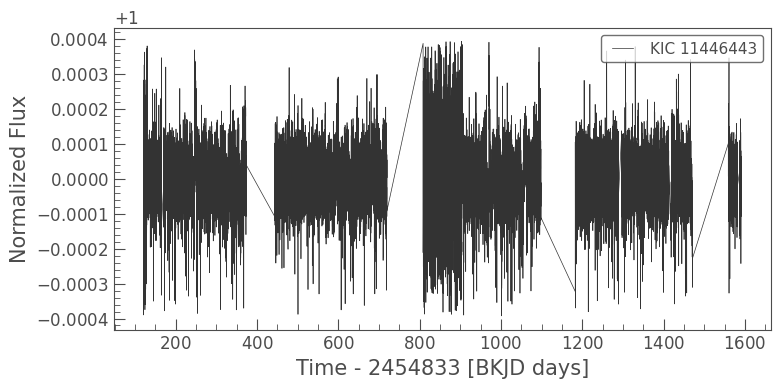

In [ ]:
# Flatten the light curve
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot();

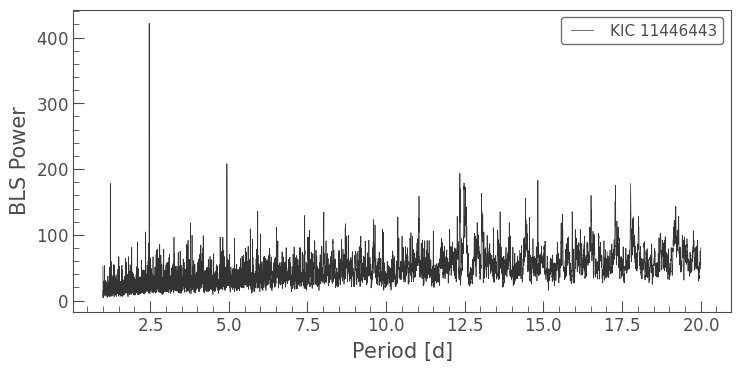

In [ ]:
import numpy as np
# Create array of periods to search
period = np.linspace(1, 20, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

In [ ]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
planet_b_period

<Quantity 2.47074707 d>

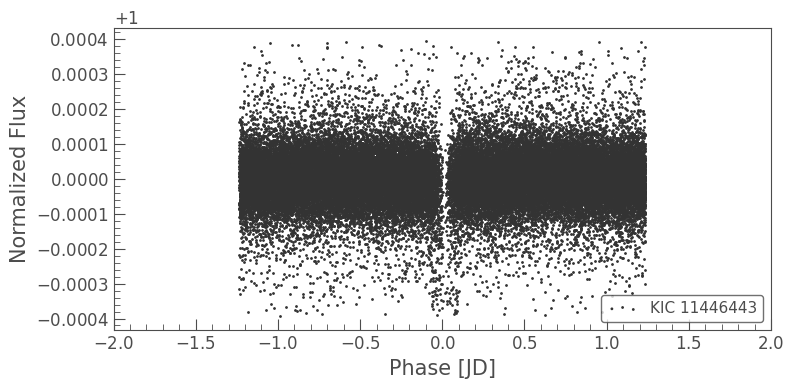

In [ ]:
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-2, 2);

In [ ]:
# Create a BLS model using the BLS parameters
planet_b_model = bls.get_transit_model(period=planet_b_period,
                                       transit_time=planet_b_t0,
                                       duration=planet_b_dur)

(-2.0, 2.0)

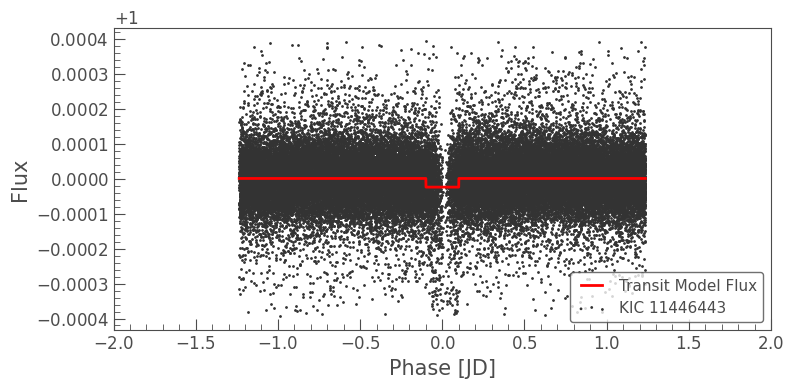

In [ ]:
ax = lc.fold(planet_b_period, planet_b_t0).scatter()
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-2, 2)

In [23]:
import lightkurve as lk
import pandas as pd
import matplotlib.pyplot as plt

lc_data=[]
radii_data=[]
period_data=[]
dur_data=[]

for ind, row in KOI.iterrows():
  if row['koi_disposition'] != 'CONFIRMED':
    kepid = str(row['kepid'])
    radius = row['koi_prad']
    search_result = lk.search_lightcurve(kepid, author='Kepler', cadence='long')
    lc_collection = search_result.download_all()
    #lc_collection.plot();
    lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
    #lc.plot();
    # Create array of periods to search
    period = np.linspace(1, 20, 10000)
    # Create a BLSPeriodogram
    bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
    #bls.plot();
    planet_b_period = bls.period_at_max_power
    planet_b_t0 = bls.transit_time_at_max_power
    planet_b_dur = bls.duration_at_max_power

    #planet_b_model = bls.get_transit_model(period=planet_b_period, transit_time=planet_b_t0, duration=planet_b_dur/24)
    #ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
    #planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
    #lc.fold(planet_b_period, planet_b_t0).bin(planet_b_period/1000).plot(ax=ax, c='r', lw=2, label='Binned Flux')
    lc_data.append(lc.fold(planet_b_period, planet_b_t0).bin(planet_b_period/1000).flux)
    radii_data.append(radius)
    period_data.append(planet_b_period)
    dur_data.append(planet_b_dur)
    if ind > 600:
      break

LightkurveError: ignored

134

In [32]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D, Embedding
from keras.datasets import imdb
from keras.utils import plot_model
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
# Graphic output
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [142]:
x=np.empty([134,1001])
y=np.empty([134])
k = 0
for i in range(len(lc_data)):
  if len(lc_data[i]) == 1000:
    x_i = np.append(lc_data[i].value, period_data[i].value)
    if np.isnan(radii_data[i]):
      continue
    
    x[k,:] = x_i
    y[k] = radii_data[i]
    k = k + 1

x_train = x[0:100];
x_test = x[100:k];
y_train = y[0:100];
y_test = y[100:k];
  




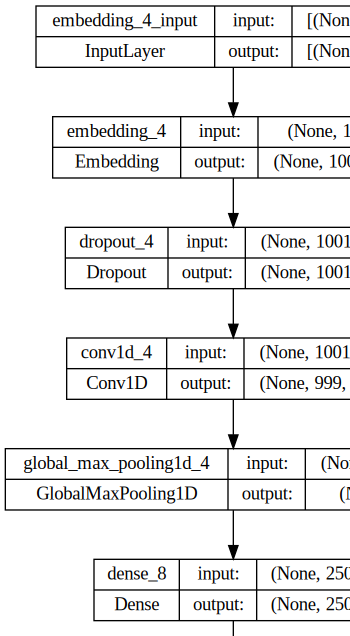

In [152]:
model = Sequential()
model.add(Embedding(input_dim=1001, output_dim=50, input_length=1001))
model.add(Dropout(0.5))
model.add(Conv1D(filters=250, kernel_size=3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(250))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])  
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

In [147]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


InvalidArgumentError: ignored

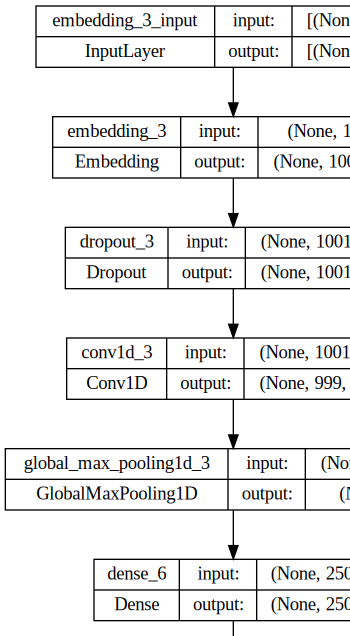

In [151]:
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))